# Testing with class definitions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from quantum_mechanics import WaveFunction
from utils import inner_product

In [4]:
N = 1000
%time wf = WaveFunction(N)
%time wf.matrix_box_potential()
%time wf.solve_eigenvalues()

Wall time: 0 ns
Wall time: 999 µs
Wall time: 755 ms


In [13]:
x = np.linspace(0, 1, wf.N)
t = np.linspace(0,100, 10000)

Define the x-axis and time axis. Now create the initial state $\Psi_0 = \sqrt2\sin(\pi x)$

In [14]:
psi_0 = np.sqrt(2)*np.sin(np.pi*x) # 
# psi_test = x*(x-1)
# psi_test =  psi_test  / np.sqrt(inner_product(psi_test, psi_test))

In [15]:
%time wf.construct_psi(psi_0, t)

Wall time: 2.77 s


Text(0.5, 0, '$x$')

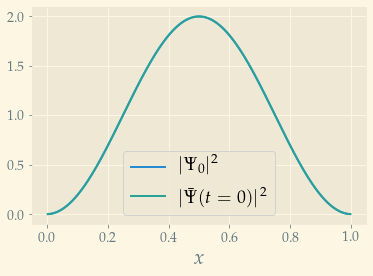

In [16]:
plt.plot(x, np.abs(psi_0)**2, label = fr"$|\Psi_0|^2$")
plt.plot(x, np.abs(wf.psi[0])**2, label = fr"$|\bar\Psi(t=0)|^2$")
plt.legend(loc="best")
plt.xlabel(fr"$x$", size=20)

In [17]:
n= np.arange(0, wf.N)

Text(0.5, 0, '$n$')

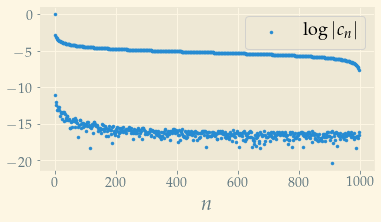

In [18]:
plt.figure(figsize=(6, 3))
plt.scatter(n, np.log10(np.abs(wf.cn)), marker=".",lw=0.5, label=fr"$\log|c_n|$")
plt.legend()
plt.xlabel(r"$n$", size=20)

In [19]:
%%time
norm=[]
for p in wf.psi:
    norm.append(inner_product(p, p))

Wall time: 105 ms


C:\Users\KarlKristian\Anaconda3\envs\numfys\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


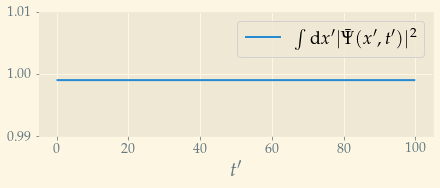

In [21]:
fig =plt.figure(figsize=(6, 2.5), constrained_layout=True)
plt.plot(t, norm, label=fr"$\int\mathrm{{d}}x'|\bar\Psi(x', t')|^2$")
plt.ylim(0.99, 1.01)
plt.xlabel(fr"$t'$",size=20)
plt.legend()
plt.savefig("report/img/normalization.png", facecolor=fig.get_facecolor())

In [ ]:
from utils import dirac_delta

In [ ]:
dd = dirac_delta(wf.N)

In [ ]:
%time wf.construct_psi(dd, t)